In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
def lambda_inv_power(a, b, r0, r, I0):
    return 1 / (a + b * I0 * (r0 + r))

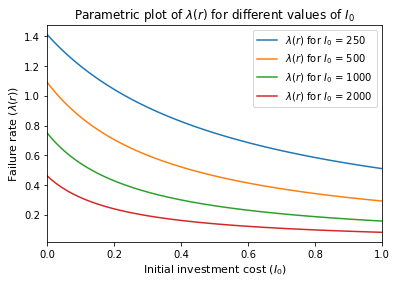

In [3]:
a = 0.5  
b = 0.005  
r0 = 1/6 
I0_list = [250, 500, 1000, 2000] 
r_range = np.linspace(0, 1, 100)

for I0 in I0_list:
    lambda_values = [lambda_inv_power(a, b, r0, r, I0) for r in r_range]
    plt.plot(r_range, lambda_values, label=f'$\lambda(r)$ for $I_{0}$ = {I0:.0f}')

plt.title('Parametric plot of $\lambda(r)$ for different values of $I_0$', fontsize=12)
plt.xlabel('Initial investment cost ($I_{0}$)', fontsize=11)
plt.ylabel('Failure rate $(\lambda(r))$', fontsize=11)
plt.legend()
plt.xlim(0, 1)
plt.show()

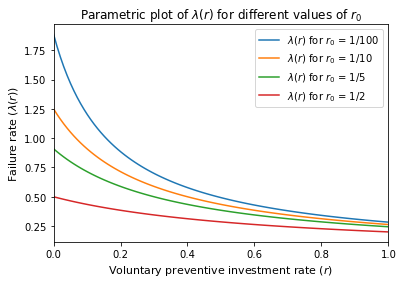

In [4]:
a = 0.5
b = 0.005
I0 = 600
r0_list = [1/100, 1/10, 1/5, 1/2]  
r0_labels = ["1/100", "1/10", "1/5", "1/2"]     
r_range = np.linspace(0, 1, 100)

for r0, label in zip(r0_list, r0_labels):
    lambda_values = [lambda_inv_power(a, b, r0, r, I0) for r in r_range]
    plt.plot(r_range, lambda_values, label=f'$\lambda(r)$ for $r_0$ = {label}')

plt.title('Parametric plot of $\lambda(r)$ for different values of $r_0$', fontsize=12)
plt.xlabel('Voluntary preventive investment rate ($r$)', fontsize=11)
plt.ylabel('Failure rate $(\lambda(r))$', fontsize=11)
plt.legend()
plt.xlim(0, 1)
plt.show()

In [5]:
def beta(mu, sigma, rho):
    return  (1 / 2) - (mu / (sigma**2)) + sqrt(((1 / 2) - (mu / (sigma**2)))**2 + (2*rho)/(sigma**2))

In [6]:
def XR(a, b, I0, r0, rho, mu, u, sigma):
    q = beta(mu, sigma, rho)
    return (1/b)*(((2*q - 1)*sqrt(u)+sqrt(4*(q-1)*q*(rho-mu)*((b*I0)-a)+u))/(2*(q-1)))**2
def X0(a, b, I0, r0, rho, mu, u, sigma):
    q = beta(mu, sigma, rho)
    return (q/(q-1))*(rho-mu+(u/(a+(b*I0*r0))))*I0*(1+r0)

In [7]:
def flip(a, b, I0, r0, rho, mu, u, sigma):
    q = beta(mu, sigma, rho)
    numerator = (a + (b * I0 * r0))**2 * (rho - mu + (u / (a + (b * I0 * r0)))) * (q - 1)
    denominator = b * u * q
    expression = (numerator / denominator) - (I0 * (1 + r0))
    return expression

In [8]:
def threshold(a, b, I0, r0, rho, mu, u, sigma):
    threshold_R = XR(a, b, I0, r0, rho, mu, u, sigma)
    threshold_0 = X0(a, b, I0, r0, rho, mu, u, sigma)
    flip_val = flip(a, b, I0, r0, rho, mu, u, sigma)
    return threshold_R if flip_val <= 0 else threshold_0

In [9]:
def preventive_rate(a, b, I0, r0, rho, mu, u, sigma):
    x = threshold(a, b, I0, r0, rho, mu, u, sigma)
    r_star = (1/I0) * ((((sqrt(b*u*x))-u)/(b*(rho-mu))) - ((a+(b*I0*r0))/b))
    return max(r_star, 0)

In [10]:
a, b = 0.5, 0.005
I0, r0 = 600, 1/6
rho, mu = 0.09, 0.01
u, sigma = 0.01, 0.5

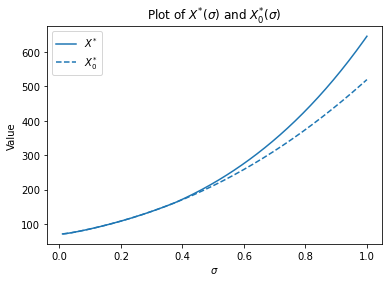

In [11]:
sigmas = np.linspace(0.01, 1, 400)
X_values = np.array([threshold(a, b, I0, r0, rho, mu, u, sigma) for sigma in sigmas])
X0_values = np.array([X0(a, b, I0, r0, rho, mu, u, sigma) for sigma in sigmas])

color = 'tab:blue'  
plt.plot(sigmas, X_values, label='$X^{*}$', color=color)
plt.plot(sigmas, X0_values, label='$X^{*}_{0}$', color=color, linestyle='--')
plt.title('Plot of $X^{*}(\sigma)$ and $X^{*}_{0}(\sigma)$')
plt.xlabel('$\sigma$')
plt.ylabel('Value')
plt.legend()
plt.savefig('sig1.png', facecolor='w', bbox_inches='tight')
plt.show()

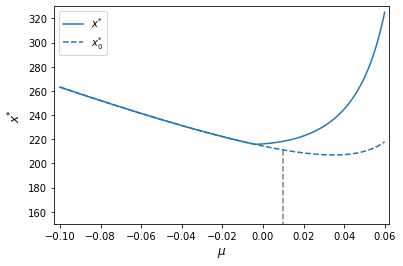

In [12]:
a, b = 0.5, 0.005
I0, r0 = 600, 1/6
rho, sigma, u = 0.09, 0.5, 0.01
mus = np.linspace(-0.1, 0.06, 400)
X_values = np.array([threshold(a, b, I0, r0, rho, mu, u, sigma) for mu in mus])
X0_values = np.array([X0(a, b, I0, r0, rho, mu, u, sigma) for mu in mus])

color = 'tab:blue'
plt.plot(mus, X_values, label='$x^{*}$', color=color)
plt.plot(mus, X0_values, label='$x^{*}_{0}$', color=color, linestyle='--')
mu_target = 0.01
X0_target = X0(a, b, I0, r0, rho, mu_target, u, sigma)
plt.vlines(mu_target, ymin=0, ymax=X0_target, color='grey', linestyle='--', linewidth=1.5)
plt.xlabel('$\mu$', fontsize=12)
plt.ylabel('$x^{*}$', fontsize=12)
plt.legend()
plt.ylim(150, 330)
plt.xlim(-0.103, 0.062)
plt.show()

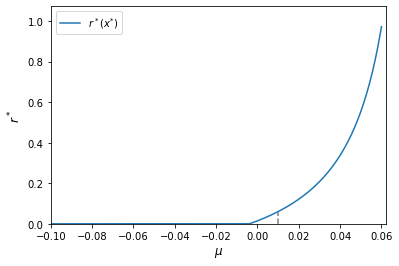

In [13]:
r_star_values = np.array([preventive_rate(a, b, I0, r0, rho, mu, u, sigma) for mu in mus])
plt.plot(mus, r_star_values, label='$r^*(x^{*})$', color='tab:blue')
r_target = preventive_rate(a, b, I0, r0, rho, mu_target, u, sigma)
plt.vlines(mu_target, ymin=0, ymax=r_target, color='grey', linestyle='--', linewidth=1.5)
plt.xlabel('$\mu$', fontsize=12)
plt.ylabel('$r^*$', fontsize=12)
plt.ylim(0, max(r_star_values) + 0.1)
plt.xlim(-0.1, 0.062)
plt.legend()
plt.show()

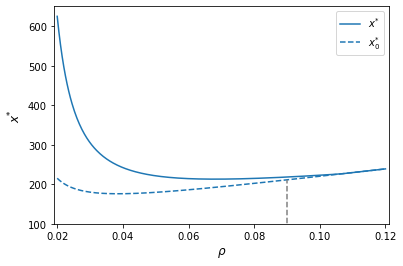

In [14]:
a, b = 0.5, 0.005
I0, r0 = 600, 1/6
mu, sigma, u = 0.01, 0.5, 0.01
rhos = np.linspace(0.02, 0.12, 400)
rho_target = 0.09
X_values = np.array([threshold(a, b, I0, r0, rho, mu, u, sigma) for rho in rhos])
X0_values = np.array([X0(a, b, I0, r0, rho, mu, u, sigma) for rho in rhos])
X0_target = X0(a, b, I0, r0, rho_target, mu, u, sigma)
plt.plot(rhos, X_values, label=r'$x^{*}$', color='tab:blue')
plt.plot(rhos, X0_values, label=r'$x^{*}_{0}$', color='tab:blue', linestyle='--')
plt.vlines(rho_target, ymin=0, ymax=X0_target, color='grey', linestyle='--', linewidth=1.5)
plt.xlabel(r'$\rho$', fontsize=12)
plt.ylabel(r'$x^{*}$', fontsize=12)
plt.ylim(100, 650)
plt.xlim(0.019, 0.121)
plt.legend()
plt.show()

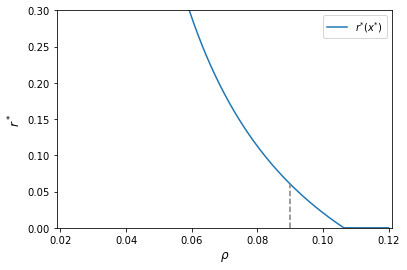

In [15]:
r_star_values = np.array([preventive_rate(a, b, I0, r0, rho, mu, u, sigma) for rho in rhos])
r_target = preventive_rate(a, b, I0, r0, rho_target, mu, u, sigma)
plt.plot(rhos, r_star_values, label=r'$r^{*}(x^{*})$', color='tab:blue')
plt.vlines(rho_target, ymin=0, ymax=r_target, color='grey', linestyle='--', linewidth=1.5)
plt.xlabel(r'$\rho$', fontsize=12)
plt.ylabel(r'$r^*$', fontsize=12)
plt.ylim(-0, 0.3)
plt.xlim(0.019, 0.121)
plt.legend()
plt.show()